In [131]:
# Analysing Premarket watch excel file and building a Strategy

In [132]:
#!pip install numpy 
#!pip install pandas
#!pip install datetime
#!pip install matplotlib.pyplot as plt
#!pip install mplfinance as mpf
#!pip install seaborn as sns
#!pip install talib as ta
#!pip install math
!pip install yfinance

In [133]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpfl
import seaborn as sns
import talib as ta
plt.style.use('fivethirtyeight')
import yfinance as yf

In [134]:
# Downloading 3M India company from Yahoo Finance
df= yf.download("^NSEI", period ="7d", interval="5m")
df.to_csv("NSEI21062021.csv")
df1=pd.read_csv("NSEI21062021.csv")
df=df1
#df=df.read_csv("NSEI21062021.csv")
#df= pd.read_csv("D:\\Python\\NSE NIFTY\\NSEI21062021.csv")

[*********************100%***********************]  1 of 1 completed


In [135]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-06-11 09:15:00+05:30,15796.450195,15815.900391,15788.900391,15812.099609,15812.099609,0
1,2021-06-11 09:20:00+05:30,15810.750000,15823.000000,15810.450195,15815.549805,15815.549805,0
2,2021-06-11 09:25:00+05:30,15815.150391,15815.599609,15803.349609,15807.900391,15807.900391,0
3,2021-06-11 09:30:00+05:30,15808.349609,15834.950195,15807.450195,15829.000000,15829.000000,0
4,2021-06-11 09:35:00+05:30,15828.150391,15831.049805,15820.049805,15825.000000,15825.000000,0
...,...,...,...,...,...,...,...
521,2021-06-21 15:10:00+05:30,15744.599609,15747.000000,15741.250000,15744.650391,15744.650391,0
522,2021-06-21 15:15:00+05:30,15744.799805,15752.450195,15743.950195,15749.950195,15749.950195,0
523,2021-06-21 15:20:00+05:30,15749.450195,15764.599609,15749.400391,15752.650391,15752.650391,0
524,2021-06-21 15:25:00+05:30,15753.549805,15754.049805,15743.299805,15748.599609,15748.599609,0


In [136]:
# TO ADD A COLUMN WITH DIFF OF HIGH AND LOW

In [137]:
df["diff_Ratio"] = (df["High"] - df["Low"])/(df["Close"] - df["Open"])

<AxesSubplot:>

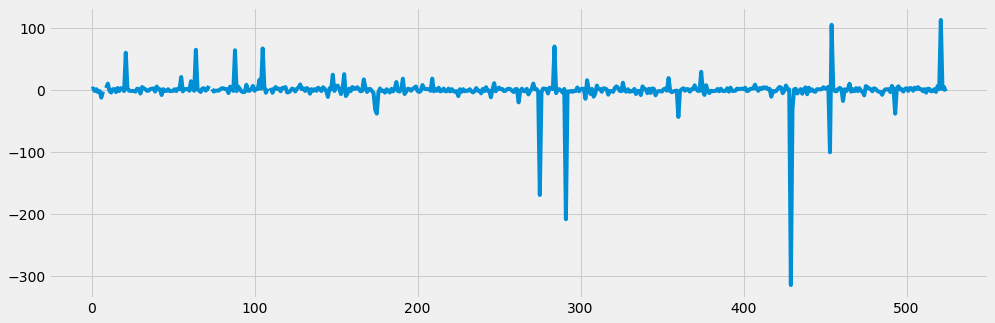

In [138]:
df["diff_Ratio"].plot(figsize=(15,5))

In [139]:
df["diff_Ratio"].describe()

count    525.000000
mean            inf
std             NaN
min     -315.235294
25%       -1.862888
50%        1.198986
75%        2.191805
max             inf
Name: diff_Ratio, dtype: float64

In [140]:
# TO ADD A COLUMN WITH DIFF OF OPEN AND CLOSE

In [141]:
df["diff c_o"] =df["Close"] - df["Open"]

In [142]:
# TO FIND DIFF VOLUME OF PRESENT AND PREVIOUS CANDLE

In [143]:
i=1
df["diff_vol"] = np.nan
for i in range(len(df)-1):
    df["diff_vol"][i] = df["Volume"][i+1] - df["Volume"][i]
    

C:\Users\Admin\anaconda3\envs\Oanda1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [144]:
df.round(2)

,Datetime,Open,High,Low,Close,Adj Close,Volume,diff_Ratio,diff c_o,diff_vol
0,2021-06-11 09:15:00+05:30,15796.45,15815.90,15788.90,15812.10,15812.10,0,1.73,15.65,0.0
1,2021-06-11 09:20:00+05:30,15810.75,15823.00,15810.45,15815.55,15815.55,0,2.61,4.80,0.0
2,2021-06-11 09:25:00+05:30,15815.15,15815.60,15803.35,15807.90,15807.90,0,-1.69,-7.25,0.0
3,2021-06-11 09:30:00+05:30,15808.35,15834.95,15807.45,15829.00,15829.00,0,1.33,20.65,0.0
4,2021-06-11 09:35:00+05:30,15828.15,15831.05,15820.05,15825.00,15825.00,0,-3.49,-3.15,0.0
...,...,...,...,...,...,...,...,...,...,...
521,2021-06-21 15:10:00+05:30,15744.60,15747.00,15741.25,15744.65,15744.65,0,113.23,0.05,0.0
522,2021-06-21 15:15:00+05:30,15744.80,15752.45,15743.95,15749.95,15749.95,0,1.65,5.15,0.0
523,2021-06-21 15:20:00+05:30,15749.45,15764.60,15749.40,15752.65,15752.65,0,4.75,3.20,0.0
524,2021-06-21 15:25:00+05:30,15753.55,15754.05,15743.30,15748.60,15748.60,0,-2.17,-4.95,0.0


In [145]:
df.fillna(value=None, method="bfill" , inplace=True)

In [146]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,diff_Ratio,diff c_o,diff_vol
0,2021-06-11 09:15:00+05:30,15796.450195,15815.900391,15788.900391,15812.099609,15812.099609,0,1.725304,15.649414,0.0
1,2021-06-11 09:20:00+05:30,15810.750000,15823.000000,15810.450195,15815.549805,15815.549805,0,2.614649,4.799805,0.0
2,2021-06-11 09:25:00+05:30,15815.150391,15815.599609,15803.349609,15807.900391,15807.900391,0,-1.689655,-7.250000,0.0
3,2021-06-11 09:30:00+05:30,15808.349609,15834.950195,15807.450195,15829.000000,15829.000000,0,1.331694,20.650391,0.0
4,2021-06-11 09:35:00+05:30,15828.150391,15831.049805,15820.049805,15825.000000,15825.000000,0,-3.491631,-3.150391,0.0
...,...,...,...,...,...,...,...,...,...,...
521,2021-06-21 15:10:00+05:30,15744.599609,15747.000000,15741.250000,15744.650391,15744.650391,0,113.230769,0.050781,0.0
522,2021-06-21 15:15:00+05:30,15744.799805,15752.450195,15743.950195,15749.950195,15749.950195,0,1.650360,5.150391,0.0
523,2021-06-21 15:20:00+05:30,15749.450195,15764.599609,15749.400391,15752.650391,15752.650391,0,4.749466,3.200195,0.0
524,2021-06-21 15:25:00+05:30,15753.549805,15754.049805,15743.299805,15748.599609,15748.599609,0,-2.171631,-4.950195,0.0


In [147]:
# Logic for genrating callls

In [159]:
#Check the Sentiment based on diff Ratio, diff o_c of present candle and diff_vol of present candle and next candle
df["Sentiment"] =np.nan
df.to_numpy()
for i in range(len(df)-1):
    
    if df["diff_Ratio"][i] >= - 5 and df["diff_Ratio"][i] <= 5  and df["diff c_o"][i] > 5.00:
    #if df["diff_Ratio"][i] <= 500.00 and df["diff c_o"][i] > 10.00 and df["diff_vol"][i+1] > df["diff_vol"][i] :    
    #if df["diff_vol"][i+1] > df["diff_vol"][i] and df["diff c_o"][i] > 10.00:
        df["Sentiment"][i] = 1
        print("Market Sentiment Positive @ : ", df["Datetime"][i])
        #print(" Entry Time=", df["Datetime"][i])
        print(" *********************")
        
    else:
        
        df["Sentiment"][i] = 0
        print("Market Sentiment Negative @ ", df["Datetime"][i])        
        #print(" Entry Time=", df["Datetime"][i])
        print(" *********************")

C:\Users\Admin\anaconda3\envs\Oanda1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Admin\anaconda3\envs\Oanda1\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Market Sentiment Positive @ :  2021-06-11 09:15:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 09:20:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 09:25:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-11 09:30:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 09:35:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 09:40:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 09:45:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 09:50:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 09:55:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 10:00:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 10:05:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 10:10:00+05:30
 *********************
Market Sentiment Negative @  2021-06-11 10:15:00+05:30
 ****

Market Sentiment Negative @  2021-06-21 13:45:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-21 13:50:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-21 13:55:00+05:30
 *********************
Market Sentiment Negative @  2021-06-21 14:00:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-21 14:05:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-21 14:10:00+05:30
 *********************
Market Sentiment Negative @  2021-06-21 14:15:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-21 14:20:00+05:30
 *********************
Market Sentiment Negative @  2021-06-21 14:25:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-21 14:30:00+05:30
 *********************
Market Sentiment Positive @ :  2021-06-21 14:35:00+05:30
 *********************
Market Sentiment Negative @  2021-06-21 14:40:00+05:30
 *********************
Market Sentiment Negative @  2021-06-21 14:45:00+0

In [149]:
#printing the last 5 days market sentiment, 0 implies sell, 1 imples buy
print(df["Sentiment"].tail(5))
print(df["Datetime"].tail())

521    0.0
522    0.0
523    0.0
524    0.0
525    NaN
Name: Sentiment, dtype: float64
521    2021-06-21 15:10:00+05:30
522    2021-06-21 15:15:00+05:30
523    2021-06-21 15:20:00+05:30
524    2021-06-21 15:25:00+05:30
525    2021-06-21 15:30:00+05:30
Name: Datetime, dtype: object


In [150]:
df["diff_Ratio"].tail(10)

516     -1.727969
517      1.349035
518     -3.080970
519      6.382093
520      1.288634
521    113.230769
522      1.650360
523      4.749466
524     -2.171631
525           NaN
Name: diff_Ratio, dtype: float64

In [151]:
df["Datetime"].tail(10)

516    2021-06-21 14:45:00+05:30
517    2021-06-21 14:50:00+05:30
518    2021-06-21 14:55:00+05:30
519    2021-06-21 15:00:00+05:30
520    2021-06-21 15:05:00+05:30
521    2021-06-21 15:10:00+05:30
522    2021-06-21 15:15:00+05:30
523    2021-06-21 15:20:00+05:30
524    2021-06-21 15:25:00+05:30
525    2021-06-21 15:30:00+05:30
Name: Datetime, dtype: object

In [158]:
df.iloc[[-1,-2,-3,-4,-5,-6,-8-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-20,-21,-22], [0, 7]]

,Datetime,diff_Ratio
525,2021-06-21 15:30:00+05:30,NaN
524,2021-06-21 15:25:00+05:30,-2.171631
523,2021-06-21 15:20:00+05:30,4.749466
522,2021-06-21 15:15:00+05:30,1.650360
521,2021-06-21 15:10:00+05:30,113.230769
520,2021-06-21 15:05:00+05:30,1.288634
511,2021-06-21 14:20:00+05:30,1.463201
518,2021-06-21 14:55:00+05:30,-3.080970
517,2021-06-21 14:50:00+05:30,1.349035
516,2021-06-21 14:45:00+05:30,-1.727969
